# Outlier in den Sensor-Daten

In [1]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import json
from pandas.io.json import json_normalize
import os
import numpy as np

In [2]:
# Read data (first container) and two random container samples to compare

srcDir = '../data/raw/'
string = open(srcDir+'70b3d500700016dA.txt','r').read()
string2 = open(srcDir+"70b3d50070001704.txt",'r').read()
string3 = open(srcDir+"70b3d50070001726.txt",'r').read()

jsonData = pd.read_json(string, lines = True)
jsonData2 = pd.read_json(string2, lines = True)
jsonData3 = pd.read_json(string3, lines = True)

df_garbage = pd.DataFrame(jsonData[1][0])
df_garbage2 = pd.DataFrame(jsonData2[1][0])
df_garbage3 = pd.DataFrame(jsonData3[1][0])

In [3]:
# decoded_data is a nested dict. -> we normalise the data here

# container 1
dict_garbage = df_garbage.decoded_data[0]
keys_garbage = dict_garbage.keys()
values_garbage = dict_garbage.values()
df_decoded_data = json_normalize(df_garbage.decoded_data)

# container 2
dict_garbage2 = df_garbage2.decoded_data[0]
keys_garbage2 = dict_garbage2.keys()
values_garbage2 = dict_garbage2.values()
df_decoded_data2 = json_normalize(df_garbage2.decoded_data)

# container 3
dict_garbage3 = df_garbage3.decoded_data[0]
keys_garbage3 = dict_garbage3.keys()
values_garbage3 = dict_garbage3.values()
df_decoded_data3 = json_normalize(df_garbage3.decoded_data)

<ipython-input-3-7afb4b928783>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data = json_normalize(df_garbage.decoded_data)
<ipython-input-3-7afb4b928783>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data2 = json_normalize(df_garbage2.decoded_data)
<ipython-input-3-7afb4b928783>:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_decoded_data3 = json_normalize(df_garbage3.decoded_data)


In [4]:
df_decoded_data.head()

,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.ts,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data
0,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,14 C,1 Degree,...,1620498360377,4097,2,867500000,123,SF8 BW125 4/5,False,"[{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...",254,ffff22b8da1600700138383838700e01c1
1,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,17 C,1 Degree,...,1620494765501,4096,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...",254,ffff22b8da1600700138383838701101c0
2,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,108 cm,108 cm,108 cm,108 cm,3630 mV,15 C,0 Degree,...,1620491158880,4095,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...",254,ffff22b8da1600700136363636710f00bf
3,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,126 cm,126 cm,126 cm,126 cm,3630 mV,19 C,1 Degree,...,1620487559091,4094,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...",254,ffff22b8da160070013f3f3f3f711301be
4,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,118 cm,118 cm,118 cm,118 cm,3630 mV,20 C,0 Degree,...,1620483959154,4093,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...",254,ffff22b8da160070013b3b3b3b711400bd


In [5]:
# Start with sensor_data_status and see if its is equal
print(all([df_decoded_data["sensor_data.Status"][0] == x for x in df_decoded_data["sensor_data.Status"]]))
print(all([df_decoded_data2["sensor_data.Status"][0] == x for x in df_decoded_data2["sensor_data.Status"]]))
print(all([df_decoded_data3["sensor_data.Status"][0] == x for x in df_decoded_data3["sensor_data.Status"]]))

True
True
True


In [44]:
# sensor_data.Events
print(all([df_decoded_data["sensor_data.Events"][0] == x for x in df_decoded_data["sensor_data.Events"]]))
print(all([df_decoded_data2["sensor_data.Events"][0] == x for x in df_decoded_data3["sensor_data.Events"]]))
print(all([df_decoded_data3["sensor_data.Events"][0] == x for x in df_decoded_data3["sensor_data.Events"]]))

True
True
True


In [7]:
# sensor_data.Voltage
print(all([df_decoded_data["sensor_data.Voltage"][0] == x for x in df_decoded_data["sensor_data.Voltage"]]))

False


In [9]:
# str -> int, to analyse

voltage_int1 = [int(v[:-3]) for v in df_decoded_data["sensor_data.Voltage"]]
voltage_int2 = [int(v[:-3]) for v in df_decoded_data2["sensor_data.Voltage"]]
voltage_int3 = [int(v[:-3]) for v in df_decoded_data3["sensor_data.Voltage"]]

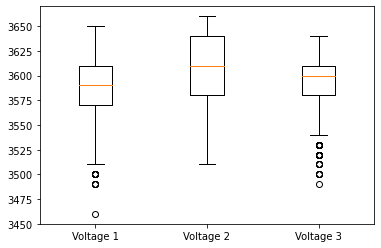

In [10]:
label = ["Voltage 1", "Voltage 2", "Voltage 3"]
plt.boxplot([voltage_int1, voltage_int2, voltage_int3], labels=label)
plt.show()

In [11]:
# we dont see extreme outlier here, but let's look at them.
# find out index voltage_int where the outlier in container 1 (3460) is to be found.
min_outlier1 = voltage_int1.index(min(voltage_int1))

In [12]:
# show the row of decoded data, where the index is 1564
df_decoded_data.iloc[min_outlier1, :]

sensor_data.Status                             [SS, Standalone, version_184]
sensor_data.Sensor ID                                               700016da
sensor_data.Events                                        SENS_EVENT_MEASURE
sensor_data.Height 1                                                   10 cm
sensor_data.Height 2                                                   10 cm
sensor_data.Height 3                                                   10 cm
sensor_data.Height 4                                                   10 cm
sensor_data.Voltage                                                  3460 mV
sensor_data.Temperature                                                244 C
sensor_data.Tilt                                                    3 Degree
sensor_data.Tx Event                                               140 Times
sensor_data.Messagetype                                              1.1.1.1
gws_data.cmd                                                              gw

In [13]:
# There is an obvious outlier in Temperature, maybe there is a connection between low  Sensor Voltage and Sensor Errors

In [29]:
# lets have a look at other rows, where the voltage is low
more_min_outlier1 = []
[more_min_outlier1.append(i) for i,x in enumerate(voltage_int1) if x < 3510]
print(more_min_outlier1)

[1494, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573]


In [45]:
# mesurements with a low sensor Voltage are listed together

In [46]:
# lets look at some other values
df_decoded_data.iloc[more_min_outlier1, :]

,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.ts,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data
1494,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,6 cm,6 cm,6 cm,6 cm,3500 mV,245 C,3 Degree,...,1613194303055,2069,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -101, 'snr': 8.8, 'ts': 161319430305...",254,ffff22b8da160070010303030364f503d5
1560,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3500 mV,247 C,3 Degree,...,1612945901401,2000,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -99, 'snr': 4.8, 'ts': 1612945901401...",224,ffff22b8da160070010505050564f70390
1561,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3490 mV,245 C,3 Degree,...,1612942301410,1999,2,868500000,71,SF7 BW125 4/5,False,"[{'rssi': -116, 'snr': -3.5, 'ts': 16129423014...",224,ffff22b8da160070010505050563f5038f
1562,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3490 mV,246 C,3 Degree,...,1612938701403,1998,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 7, 'ts': 1612938701403,...",224,ffff22b8da160070010505050563f6038e
1563,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3490 mV,246 C,3 Degree,...,1612935101391,1997,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -97, 'snr': 9.5, 'ts': 1612935101403...",224,ffff22b8da160070010505050563f6038d
1564,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3460 mV,244 C,3 Degree,...,1612931501384,1996,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -101, 'snr': 8.5, 'ts': 161293150138...",224,ffff22b8da160070010505050560f4038c
1565,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3490 mV,245 C,3 Degree,...,1612927901385,1995,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -98, 'snr': 9.2, 'ts': 1612927901385...",224,ffff22b8da160070010505050563f5038b
1566,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3490 mV,245 C,3 Degree,...,1612924301379,1994,2,868500000,71,SF7 BW125 4/5,False,"[{'rssi': -114, 'snr': -8.5, 'ts': 16129243013...",224,ffff22b8da160070010505050563f5038a
1567,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3500 mV,246 C,2 Degree,...,1612920701374,1993,2,868300000,71,SF7 BW125 4/5,False,"[{'rssi': -98, 'snr': 4, 'ts': 1612920701389, ...",224,ffff22b8da160070010505050564f60289
1568,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,10 cm,10 cm,10 cm,10 cm,3500 mV,246 C,2 Degree,...,1612917101381,1992,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -100, 'snr': 7.2, 'ts': 161291710138...",224,ffff22b8da160070010505050564f60288


In [15]:
# There is obviously a connection beween low voltage and Temperature mesurement failure, 

In [16]:
# Lets have a look at the outlier in container 3 for comparison
min_outlier3 = voltage_int3.index(min(voltage_int3))

In [17]:
df_decoded_data3.iloc[min_outlier3, :]

sensor_data.Status                             [SS, Standalone, version_184]
sensor_data.Sensor ID                                               70001726
sensor_data.Events                                        SENS_EVENT_MEASURE
sensor_data.Height 1                                                   22 cm
sensor_data.Height 2                                                   22 cm
sensor_data.Height 3                                                   22 cm
sensor_data.Height 4                                                   22 cm
sensor_data.Voltage                                                  3490 mV
sensor_data.Temperature                                                248 C
sensor_data.Tilt                                                    2 Degree
sensor_data.Tx Event                                               218 Times
sensor_data.Messagetype                                              1.1.1.1
gws_data.cmd                                                              gw

In [18]:
# Here we can see as well a connection .

In [19]:
# To be sure lets look again at the lowest sensor voltages
more_min_outlier3 = []
[more_min_outlier3.append(i) for i,x in enumerate(voltage_int3) if x < 3515]
print(more_min_outlier3)

[1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504]


In [20]:
df_decoded_data3.iloc[more_min_outlier3, :]

,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.ts,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data
1494,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3510 mV,249 C,3 Degree,...,1612944479805,2198,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -101, 'snr': 8.8, 'ts': 161294447980...",210,ffff22b826170070010b0b0b0b65f903df
1495,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3500 mV,248 C,2 Degree,...,1612940879826,2197,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 4.2, 'ts': 161294087982...",210,ffff22b826170070010b0b0b0b64f802de
1496,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3500 mV,248 C,2 Degree,...,1612937279857,2196,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -111, 'snr': 2, 'ts': 1612937279857,...",210,ffff22b826170070010b0b0b0b64f802dd
1497,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3500 mV,248 C,4 Degree,...,1612933679867,2195,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -108, 'snr': 4.8, 'ts': 161293367986...",210,ffff22b826170070010b0b0b0b64f804dc
1498,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3500 mV,249 C,2 Degree,...,1612930079888,2194,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 4.2, 'ts': 161293007988...",210,ffff22b826170070010b0b0b0b64f902db
1499,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3490 mV,248 C,2 Degree,...,1612926479909,2193,2,868300000,71,SF7 BW125 4/5,False,"[{'rssi': -103, 'snr': 2.2, 'ts': 161292647990...",210,ffff22b826170070010b0b0b0b63f802da
1500,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3500 mV,248 C,3 Degree,...,1612922879930,2192,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -104, 'snr': 6, 'ts': 1612922879930,...",233,ffff22b826170070010b0b0b0b64f803d9
1501,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3510 mV,248 C,2 Degree,...,1612919279950,2191,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5.2, 'ts': 161291927995...",233,ffff22b826170070010b0b0b0b65f802d8
1502,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3510 mV,249 C,3 Degree,...,1612908480032,2188,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -104, 'snr': 3.2, 'ts': 161290848003...",233,ffff22b826170070010b0b0b0b65f903d5
1503,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,22 cm,22 cm,22 cm,22 cm,3510 mV,249 C,2 Degree,...,1612904880053,2187,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -111, 'snr': -4, 'ts': 1612904880053...",233,ffff22b826170070010b0b0b0b65f902d4


In [21]:
# Here as well mesurement failure if the sensor has a low voltage.

## Outlier - sensor_data.voltage
- Die min Outlier, welche in der Spannung auftreten, gehen offenbar einher mit den Outlier in der Temperatur anzeige. -> Wenn Batterie schwach, fehlerhafte Temperatur messungen (~250°C)
- Der Container hat ausserdem immer einen Hohen füllstand, vielleicht gibt es damit auch einen Zusammenhang.

In [22]:
# Outlier in sensor_data.Tilt
tilt_int1 = [int(t[:-7]) for t in df_decoded_data["sensor_data.Tilt"]]
tilt_int2 = [int(t[:-7]) for t in df_decoded_data2["sensor_data.Tilt"]]
tilt_int3 = [int(t[:-7]) for t in df_decoded_data3["sensor_data.Tilt"]]

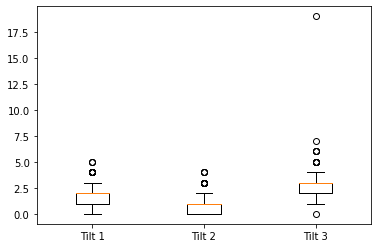

In [23]:
labels = ["Tilt 1", "Tilt 2", "Tilt 3"]
plt.boxplot([tilt_int1, tilt_int2, tilt_int3], labels=labels)
plt.show()

In [24]:
# Overall hypothesis: tilt is corresponding with height

# There is an obvious outlier in Tilt 3 -> check whats going on there
min_outlier3 = tilt_int3.index(max(tilt_int3))

In [25]:
# check the measurement correspoding to the outlier:
df_decoded_data3.iloc[min_outlier3, :]

sensor_data.Status                             [SS, Standalone, version_184]
sensor_data.Sensor ID                                               70001726
sensor_data.Events                                        SENS_EVENT_MEASURE
sensor_data.Height 1                                                   58 cm
sensor_data.Height 2                                                   58 cm
sensor_data.Height 3                                                   58 cm
sensor_data.Height 4                                                   58 cm
sensor_data.Voltage                                                  3640 mV
sensor_data.Temperature                                                 37 C
sensor_data.Tilt                                                   19 Degree
sensor_data.Tx Event                                               219 Times
sensor_data.Messagetype                                                  NaN
gws_data.cmd                                                              gw

In [26]:
# let's also check the measurement bevore and after, to compare:
# measurement t+1
df_decoded_data3.iloc[min_outlier3-1, :]

sensor_data.Status                             [SS, Standalone, version_184]
sensor_data.Sensor ID                                               70001726
sensor_data.Events                                        SENS_EVENT_MEASURE
sensor_data.Height 1                                                   54 cm
sensor_data.Height 2                                                   54 cm
sensor_data.Height 3                                                   54 cm
sensor_data.Height 4                                                   54 cm
sensor_data.Voltage                                                  3620 mV
sensor_data.Temperature                                                 27 C
sensor_data.Tilt                                                    3 Degree
sensor_data.Tx Event                                               220 Times
sensor_data.Messagetype                                                  NaN
gws_data.cmd                                                              gw

In [27]:
# measurement t-1:
df_decoded_data3.iloc[min_outlier3+1, :]

sensor_data.Status                             [SS, Standalone, version_184]
sensor_data.Sensor ID                                               70001726
sensor_data.Events                                        SENS_EVENT_MEASURE
sensor_data.Height 1                                                   58 cm
sensor_data.Height 2                                                   58 cm
sensor_data.Height 3                                                   58 cm
sensor_data.Height 4                                                   58 cm
sensor_data.Voltage                                                  3640 mV
sensor_data.Temperature                                                 45 C
sensor_data.Tilt                                                    4 Degree
sensor_data.Tx Event                                               218 Times
sensor_data.Messagetype                                                  NaN
gws_data.cmd                                                              gw

In [40]:
# expected to see any difference in height here, but there is nothing obvious.
#let's check now the other outlier with >5 degrees tilt
more_max_outlier3 = []
[more_max_outlier3.append(i) for i,t in enumerate(tilt_int3) if t > 5]
print(more_max_outlier3)

[24, 4113, 4263, 4322, 5729, 6883]


In [41]:
df_decoded_data3.iloc[more_max_outlier3, :]

,sensor_data.Status,sensor_data.Sensor ID,sensor_data.Events,sensor_data.Height 1,sensor_data.Height 2,sensor_data.Height 3,sensor_data.Height 4,sensor_data.Voltage,sensor_data.Temperature,sensor_data.Tilt,...,gws_data.ts,gws_data.fcnt,gws_data.port,gws_data.freq,gws_data.toa,gws_data.dr,gws_data.ack,gws_data.gws,gws_data.bat,gws_data.data
24,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3640 mV,30 C,6 Degree,...,1620378098363,4263,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -109, 'snr': 5.2, 'ts': 162037809837...",254,ffff22b8261700700138383838721e06f0
4113,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,88 cm,88 cm,88 cm,88 cm,3620 mV,13 C,6 Degree,...,1601381847687,6994,2,868500000,452,SF10 BW125 4/5,False,"[{'rssi': -119, 'snr': -10.2, 'ts': 1601381847...",254,ffff22b826170070012c2c2c2c700d0653
4263,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,50 cm,50 cm,50 cm,50 cm,3580 mV,10 C,6 Degree,...,1600755490008,6820,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -104, 'snr': 7.2, 'ts': 160075549000...",254,ffff22b82617007001191919196c0a06a5
4322,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,50 cm,50 cm,50 cm,50 cm,3620 mV,21 C,7 Degree,...,1600525098239,6756,2,867100000,71,SF7 BW125 4/5,True,"[{'rssi': -110, 'snr': 5.8, 'ts': 160052509824...",254,ffff22b826170070011919191970150765
5729,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,114 cm,114 cm,114 cm,114 cm,3640 mV,38 C,6 Degree,...,1594715082972,5142,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.2, 'ts': 159471508297...",254,ffff22b826170070013939393972260617
6883,"[SS, Standalone, version_184]",70001726,SENS_EVENT_MEASURE,58 cm,58 cm,58 cm,58 cm,3640 mV,37 C,19 Degree,...,1589891365402,3802,2,867100000,71,SF7 BW125 4/5,True,"[{'rssi': -109, 'snr': 4.2, 'ts': 158989136540...",254,ffff22b826170070011d1d1d1d722513db


## Outlier in sensor_data.tilt
- nach aktuellem Stand keine interessanten Kenntnisse zu den Outliern gewonnen
- Hypothese, dass sich der Tilt bei Leerung oder Ansich mit dem Füllstand zusammenhängt wurde nicht bestätigt.

In [43]:
df_garbage.head()

,id,deveui,unix_time,client_id,created_at,decoded_data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
